# Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

from math import factorial
from math import sqrt

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Необходимо привести названия столбцов к нижнему регистру (для избежания ошибок), изменить типы данных в столбцах Year_of_Release и User_Score.
  
- Year_of_Release привести к типу int64 (год выпуска - это целое число).

- User_Score привести к типу float64 (рейтинг отображается в виде десятичной дроби - числа с плавающей точкой).

- Также есть пропуски в данных.

# Шаг 2. Предобработка данных

In [5]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
tmp = data.copy()  #  Создаем копию датасета

In [8]:
# приведем данные к корректному типу
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['year_of_release'] = data['year_of_release'].fillna(0).astype('int64')

In [9]:
print('Количество пропусков', tmp.year_of_release.isna().sum(), 'Тип данных', tmp.year_of_release.dtype)
tmp.year_of_release = tmp.year_of_release.astype('Int64')
print('Количество пропусков', tmp.year_of_release.isna().sum(), 'Тип данных', tmp.year_of_release.dtype)

Количество пропусков 269 Тип данных float64
Количество пропусков 269 Тип данных Int64


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


- Столбец user_score привели к числовому типу (некорректные значения tbd - заменили на NaN c помощью errors='coerce').
- `year_of_release` - заполнили пропуски нулями (чтобы не удалять строки полностью, а нули будут указывать, что информация по году выпуска отсутствует) для приведения к целочисленному типу.

In [11]:
# посмотрим сколько всего пропусков
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

- Так как нам нужно выявить определяющие успешность игры закономерности, а успешность игры определяется, исходя из оценок, мы бы избавились от строк, где отсутствуют значения в critic_score, user_score, rating, но в нашем случае, мы бы потеряли много данных, поэтому оставим значения пустыми.

In [12]:
# от name избавимся, так как информация не полезна при отсутствии названия игры (и таких строк всего две)
data = data.dropna(subset=['name'])

In [13]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [14]:
# избавимся от строк, где неизвестен год выпуска
data = data.drop(data[data['year_of_release'] == 0].index)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [16]:
# проверим на явные дубликаты
data.duplicated().sum()

0

In [17]:
# проверим на неявные дубликаты по столбцам name, platform, year_of_release 
duplicates = data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)
data[duplicates]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [18]:
# избавимся от дубликата Madden NFL 13
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

- Пропуски обработаны, явных дубликатов не выявлено, избавились от одного неявного дубликата.
- Также решено было оставить пропуски в столбцах `critic_score`, `user_score`, `rating`, так как при их удалении мы бы избавились от большей части данных.
- Некорректные значения tbd (to be determined - от англ. будет определено) в столбце `user_score` - заменили на NaN c помощью errors='coerce'.

In [19]:
# посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
data['overall_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [20]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [21]:
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  overall_sales    16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name  

In [22]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


**Предобработка данных - Вывод**
- Были выявлены пропуски в данных - было принято решение оставить пропуски в `critic_score`, `user_score`, `rating`.
- Пропуски в `name` - удалены, так как данные без наименования не несут никакой полезной информации, и таких строк было всего две.
- По аналогии удалены строки в `year_of_release`.
- Выявлены неявные дубликаты - избавились от таких данных.


# Шаг 3. Исследовательский анализ данных

***Посмотрим как менялись продажи по платформам:***

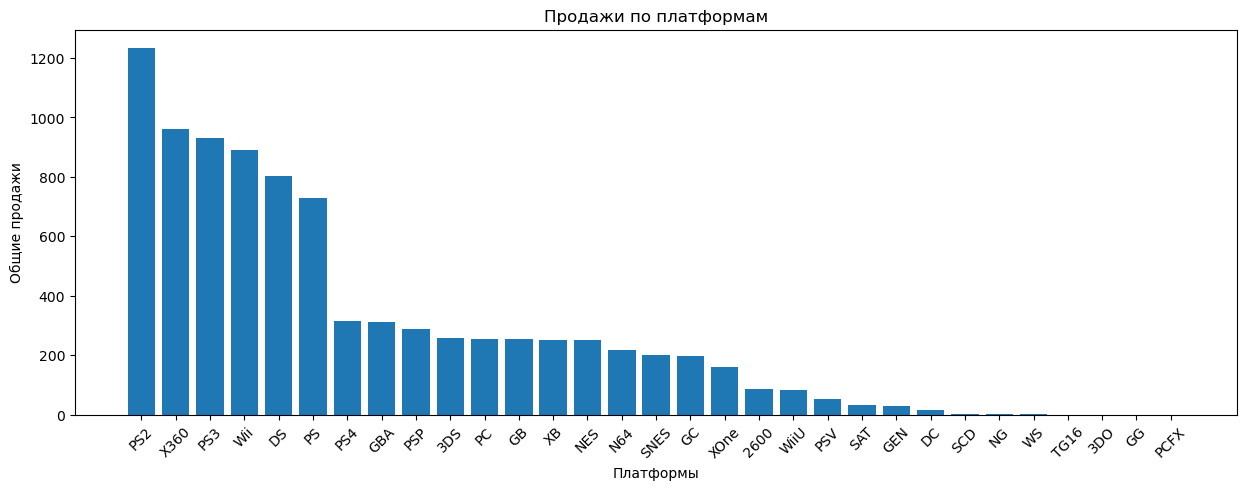

In [23]:
platform_sales = data.pivot_table(index='platform', values='overall_sales', aggfunc='sum')
platform_sales = platform_sales.reset_index().sort_values(by='overall_sales', ascending=False)

plt.figure(figsize=(15, 5))
plt.bar(platform_sales['platform'], platform_sales['overall_sales'])
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.title('Продажи по платформам')
plt.xticks(rotation=45)
plt.show()

In [24]:
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Построим распределения по топ5 платформ, которые выбрали, чтобы определить срок "жизни" каждой платформы.

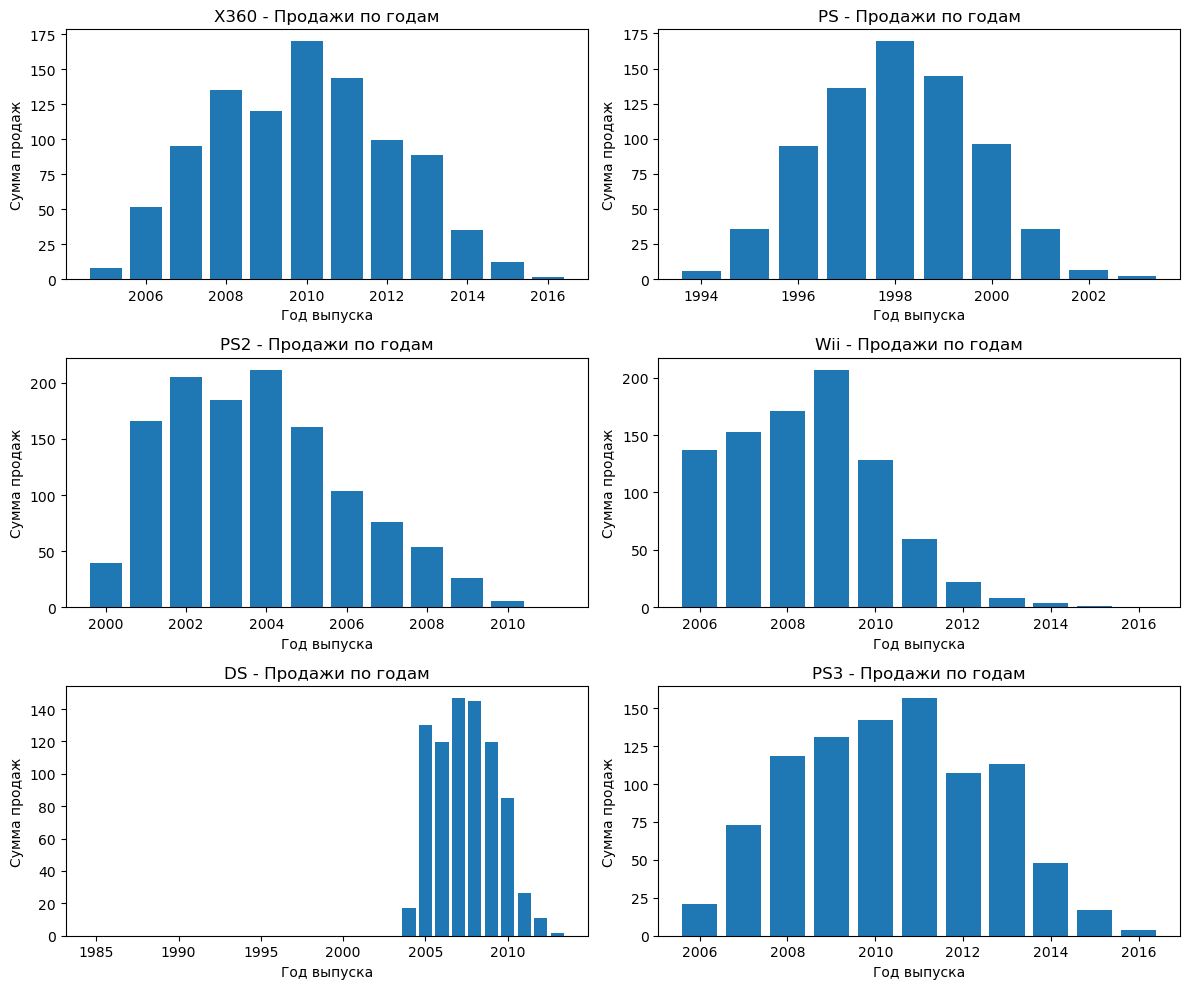

In [25]:
platforms = ['X360', 'PS', 'PS2', 'Wii', 'DS', 'PS3']

plt.figure(figsize=(12, 10))

for i, platform in enumerate(platforms, 1):
    data_platform = data.query(f'platform == "{platform}"').pivot_table(
        index='year_of_release', values='overall_sales', aggfunc='sum'
    ).reset_index()

    plt.subplot(3, 2, i)
    plt.bar(data_platform['year_of_release'], data_platform['overall_sales'])
    plt.xlabel('Год выпуска')
    plt.ylabel('Сумма продаж')
    plt.title(f'{platform} - Продажи по годам')

plt.tight_layout()
plt.show()

Определив актуальный период с 2013 по 2016 гг, создадим новую таблицу, чтобы далее работать с данными за 4 года.

In [26]:
data_13_16 = data.query('year_of_release >= 2013 & year_of_release <= 2016')
data_13_16.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Далее определим какие платформы лидируют по продажам, какие растут или падают.

In [27]:
data_13_16_pivot = data_13_16.pivot_table(index='platform', values='overall_sales', aggfunc='sum').sort_values(by='overall_sales', ascending=False)
data_13_16_pivot

,overall_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


**Топ-5 платформ по продажам:** PS4, PS3, XOne, 3DS, X360.\
Далее построим графики распределения, чтобы определить, какие из топ-5 платформ растут, а какие падают в продажах.

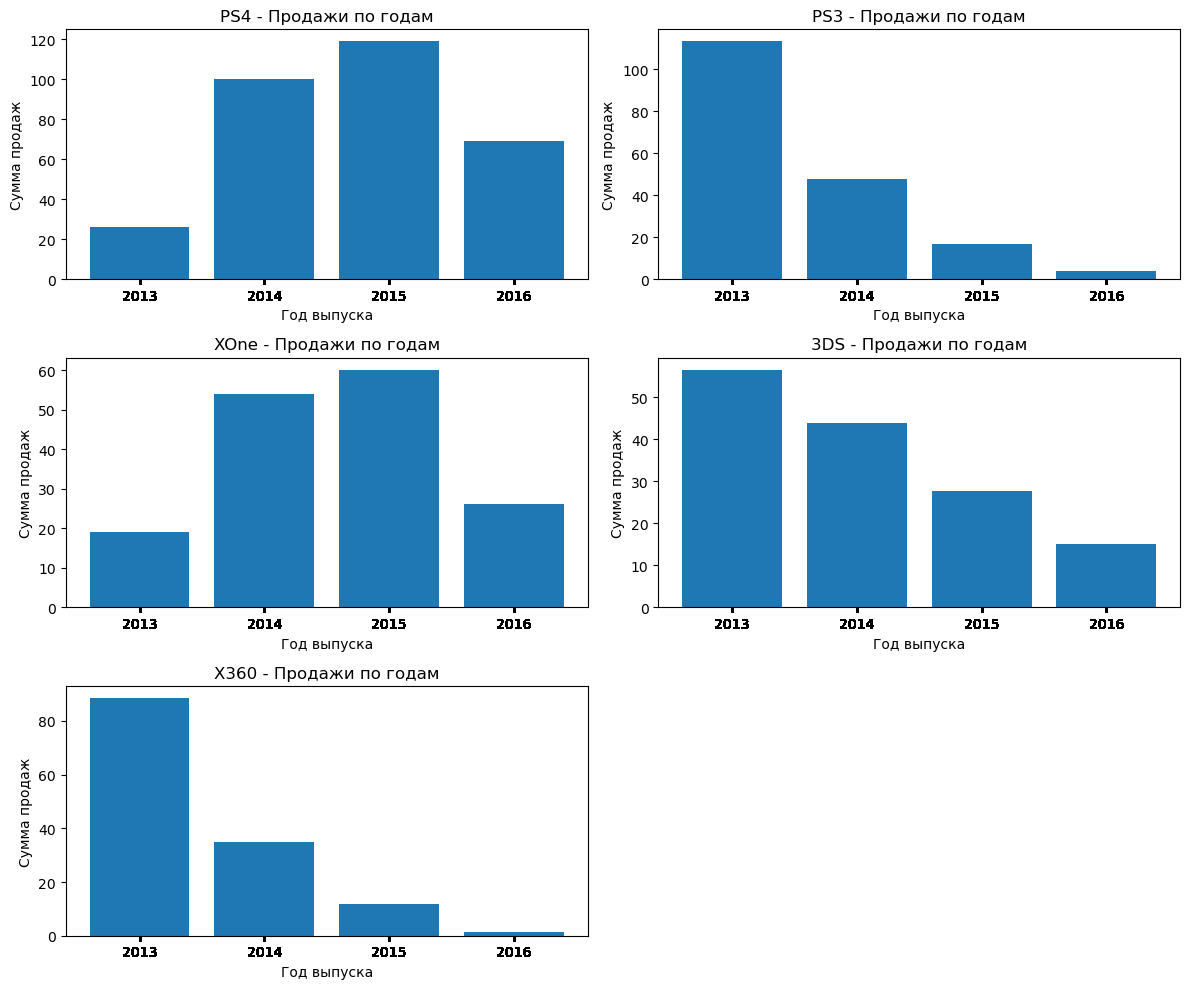

In [28]:
platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360']

plt.figure(figsize=(12, 10))

for i, platform in enumerate(platforms, 1):
    data_platform = data_13_16.query(f'platform == "{platform}"').pivot_table(
        index='year_of_release', values='overall_sales', aggfunc='sum'
    ).reset_index()

    plt.subplot(3, 2, i)
    plt.bar(data_platform['year_of_release'], data_platform['overall_sales'])
    plt.xlabel('Год выпуска')
    plt.ylabel('Сумма продаж')
    plt.title(f'{platform} - Продажи по годам')
    plt.xticks(data_13_16['year_of_release']) # применил xticks, чтобы не отображалось как: 2013.0, 2013,5 и тд. Но почему-то жирным шрифтом теперь

plt.tight_layout()
plt.show()

Наглядно видно, что продажи платформ PS3, 3DS, X360 постоянно снижаются. Продажи PS3 и X360 показали исторический минимум в 2016 году. Продажи XOne и PS3 возрастали до 2016 года, но затем начали падение. Но данные за 2016 год - неполные, поэтому 2016 может быть не показательным, но он определяет актуальный тренд.

Потенциально прибыльными платформами могут быть PS4 и XOne, так как показывали рост за определенный нами период.

## Диаграмма размаха
**Цель:** определить платформы с самыми высокими продажами.

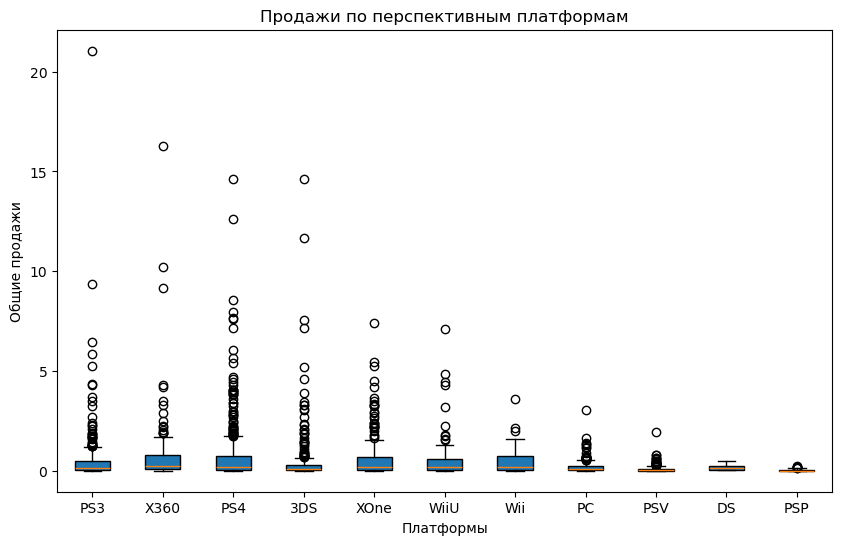

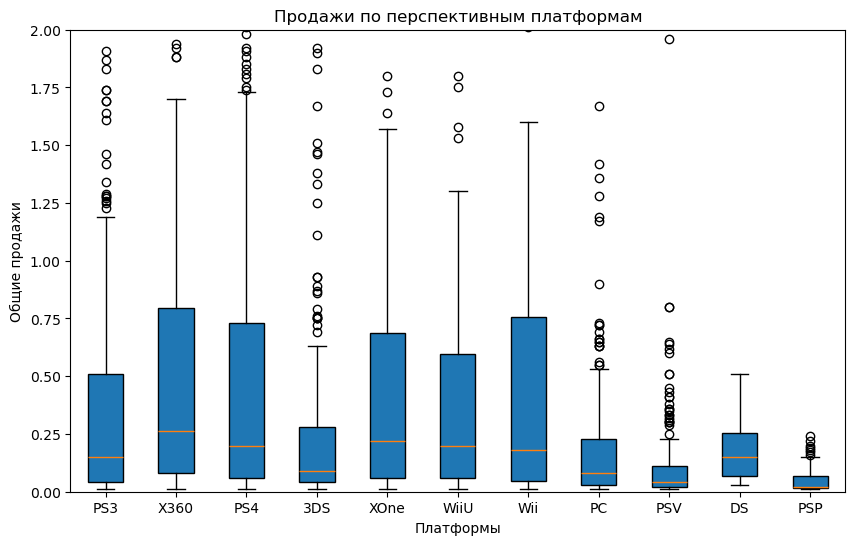

In [29]:
platforms = data_13_16['platform'].unique()
data_list = []

for platform in platforms:
    sales = data_13_16.loc[data_13_16['platform'] == platform, 'overall_sales'].values
    data_list.append(sales)

plt.figure(figsize=(10, 6))
plt.boxplot(data_list, patch_artist=True)

plt.title('Продажи по перспективным платформам')
plt.ylabel('Общие продажи')
plt.xlabel('Платформы')
plt.xticks(ticks = range(1, len(platforms)+1), labels=platforms)

plt.show()




platforms_zoom = data_13_16['platform'].unique()
data_list_zoom = []

for platform in platforms_zoom:
    sales = data_13_16.loc[data_13_16['platform'] == platform, 'overall_sales'].values
    data_list_zoom.append(sales)

plt.figure(figsize=(10, 6))
plt.boxplot(data_list_zoom, patch_artist=True)

plt.title('Продажи по перспективным платформам')
plt.ylabel('Общие продажи')
plt.xlabel('Платформы')
plt.xticks(ticks = range(1, len(platforms)+1), labels=platforms)
plt.ylim(0, 2)

plt.show()

На основе построенных диграмм размаха, можем сделать следующие выводы:
- в пределах нормальных значений (в пределах "усов") наибольшее количество продаж игр для X360 и PS4, также XOne и Wii примерно на том же уровне;
- платформа DS - наиболее стабильная и предсказуемая, так как нет выбросов, то есть за срок с 2013 по 2016 гг. никогда не было слишком высокого количества продаж игр на эту платформу;
- наиболее полезный вывод из этих графиков можем сделать на основании медиан. Медианы - устойчивы к выбросам, и могут показать нам наиболее объективную картину для сравнения этих платформ в разрезе по продажам игр для них. Самые высокие продажи, исходя из значений медианы - у платформы X360;
- также основываясь на межквартильном размахе, видно, что у платформ 3DS, PC, PSV, DS и PSP - низкие уровни продаж, в то время как X360, PS4, XOne и Wii образуют топ-4 по продажам.

## Диаграмма рессеяния
**Цель:** Проанализировать, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

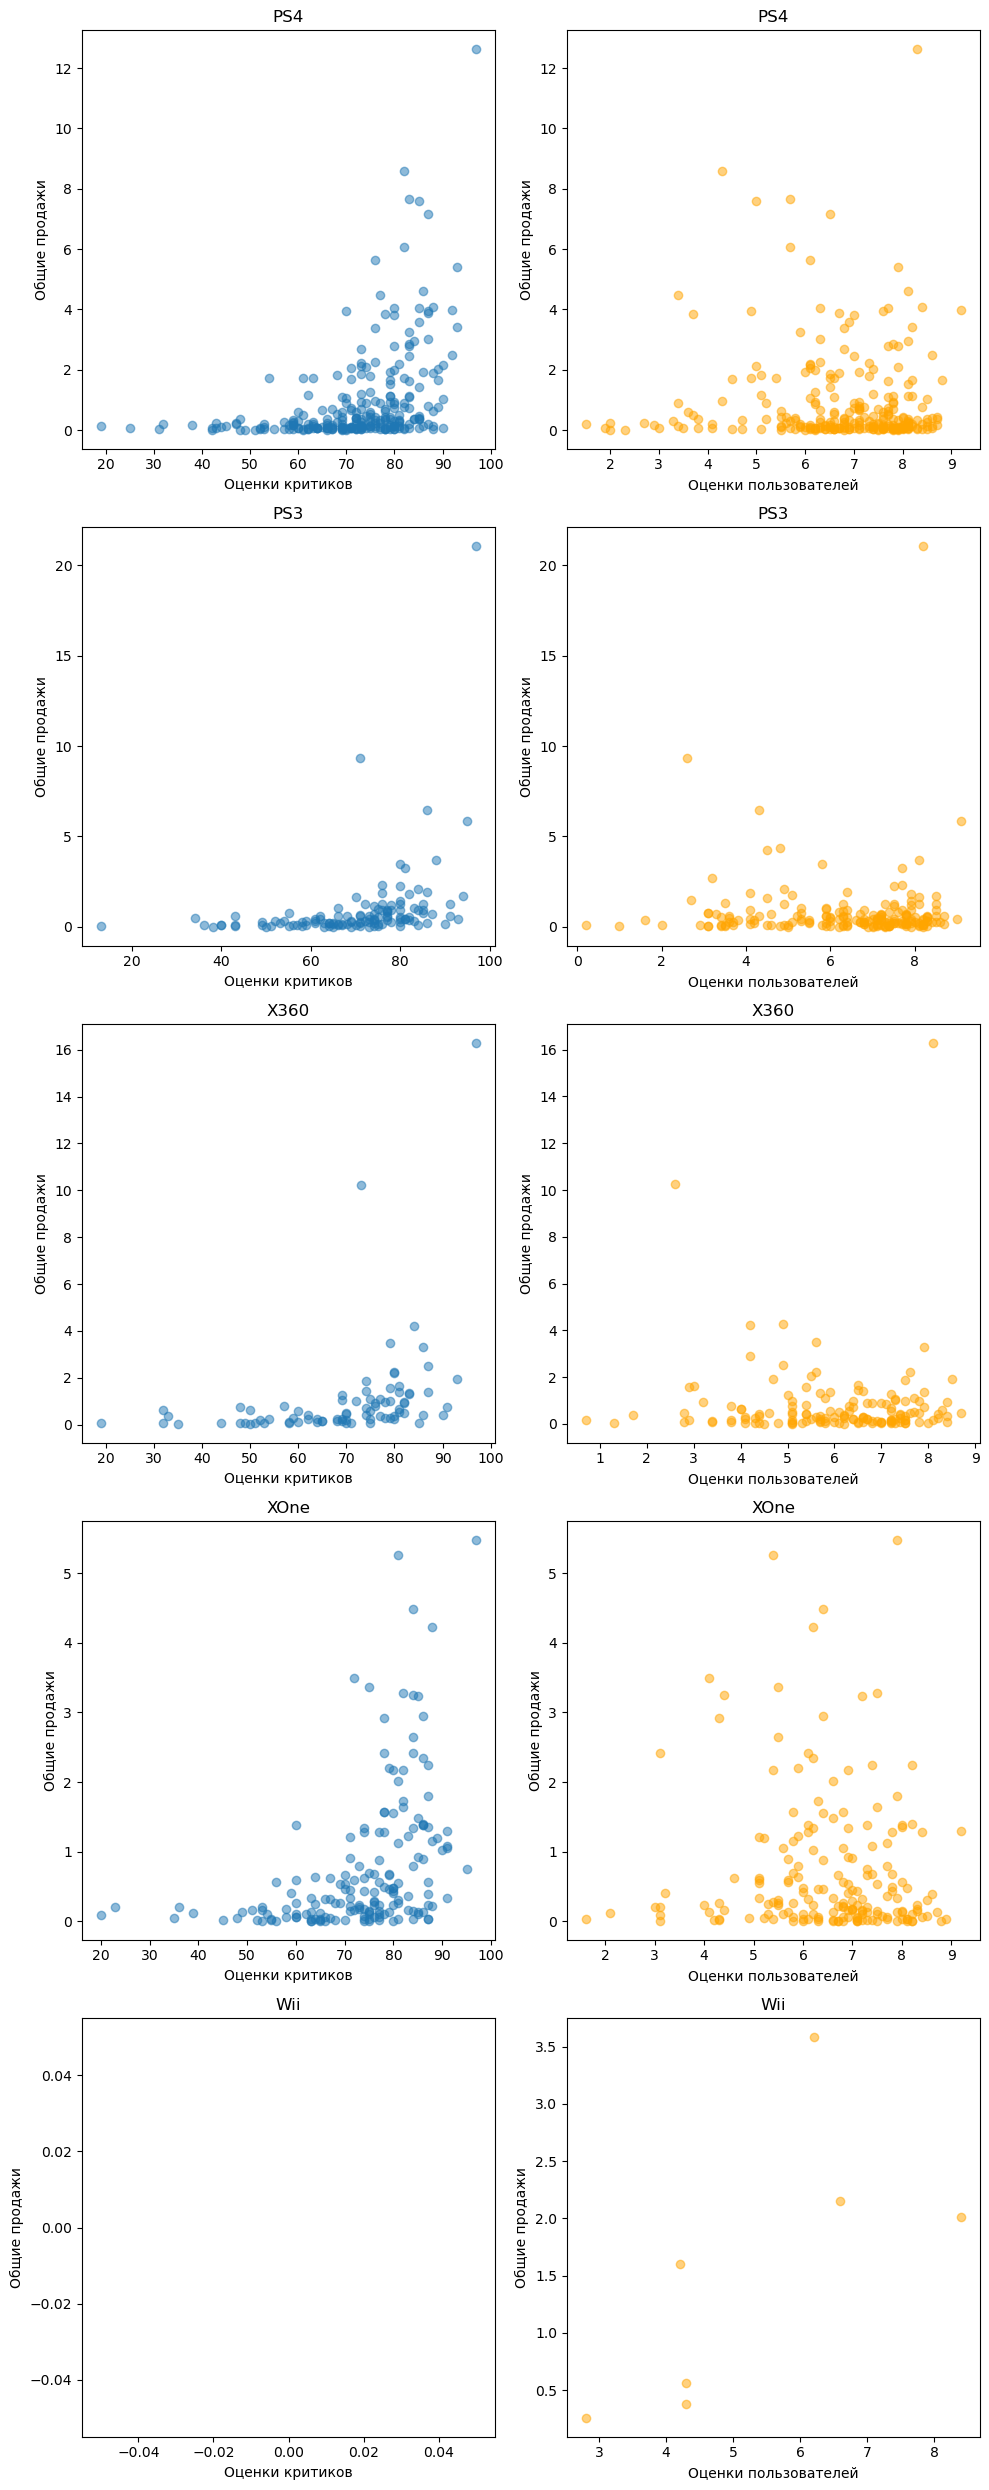

In [30]:
top_platforms = ['PS4', 'PS3', 'X360', 'XOne', 'Wii']


fig, axes = plt.subplots(len(top_platforms), 2, figsize=(10, 5 * len(top_platforms)))

# Цикл по платформам
for i, platform in enumerate(top_platforms):
    df = data_13_16.query('platform == @platform')
    
    # График 1:
    axes[i, 0].scatter(df['critic_score'], df['overall_sales'], alpha=0.5)
    axes[i, 0].set_title(f'{platform}')
    axes[i, 0].set_xlabel('Оценки критиков')
    axes[i, 0].set_ylabel('Общие продажи')

    # График 2:
    axes[i, 1].scatter(df['user_score'], df['overall_sales'], alpha=0.5, color='orange')
    axes[i, 1].set_title(f'{platform}')
    axes[i, 1].set_xlabel('Оценки пользователей')
    axes[i, 1].set_ylabel('Общие продажи')


plt.tight_layout()
plt.show()

Далее посчитаем корреляцию между отзывами и продажами, чтобы посмотреть как они связаны между собой.

In [31]:
top_platforms = ['PS4', 'PS3', 'X360', 'XOne', 'Wii']

for platform in top_platforms:
    df = data_13_16.query(f'platform == "{platform}"')

    # Убираем NaN для критиков и пользователей отдельно
    df_critic = df.dropna(subset=['overall_sales', 'critic_score'])
    df_user = df.dropna(subset=['overall_sales', 'user_score'])

    # Проверяем, есть ли хотя бы 2 значения для расчёта корреляции
    corr_critic = df_critic['overall_sales'].corr(df_critic['critic_score']) if len(df_critic) > 1 else None
    corr_user = df_user['overall_sales'].corr(df_user['user_score']) if len(df_user) > 1 else None

    print(f'{platform}:')
    print(f'Корреляция с оценками критиков: {corr_critic:.2f}' if corr_critic is not None else 'Недостаточно данных для критиков')
    print(f'Корреляция с оценками пользователей: {corr_user:.2f}' if corr_user is not None else 'Недостаточно данных для пользователей')
    print()

PS4:
Корреляция с оценками критиков: 0.41
Корреляция с оценками пользователей: -0.03

PS3:
Корреляция с оценками критиков: 0.33
Корреляция с оценками пользователей: 0.00

X360:
Корреляция с оценками критиков: 0.35
Корреляция с оценками пользователей: -0.01

XOne:
Корреляция с оценками критиков: 0.42
Корреляция с оценками пользователей: -0.07

Wii:
Недостаточно данных для критиков
Корреляция с оценками пользователей: 0.68



На основе диграмм рассеяния и расчета корреляции между отзывами и продажами можем сделать следующие выводы:
- Диаграммы рассеяния показывают, что нет прямой заивисимости между отзывами и продажами за исключением выбросов.
- Максимальное значение корреляции равно 0.42 (XOne) - это говорит о том, что все-таки нет сильной зависимости, хотя график этой платформы отличается от других, имея более широкое облако точек.
- Для Wii недостатчно данных, чтобы определить корреляцию между оценками критиков и продажами.
- Нет никакой зависимости между оценками пользователей и продажами по платформе PS3.

Далее посмотрим на общее распределение игр по жанрам, чтобы найти самые прибыльных жанры. Затем проверим, выделяются ли жанры с высокими и низкими продажами.

In [32]:
data_13_16['genre'].value_counts()

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: count, dtype: int64

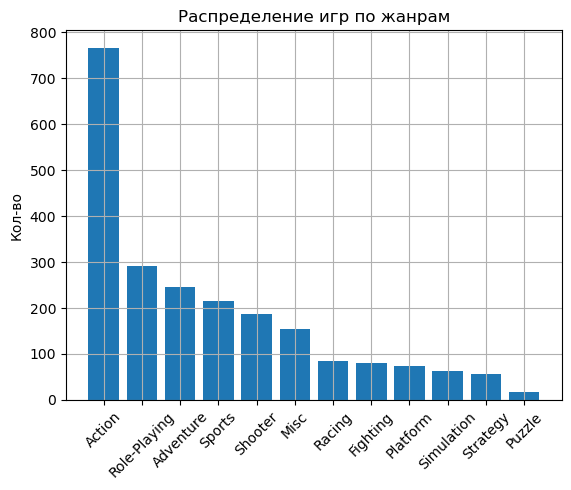

In [33]:
plt.bar(data_13_16['genre'].value_counts().index, data_13_16['genre'].value_counts())

plt.ylabel('Кол-во')
plt.title('Распределение игр по жанрам')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [34]:
data_13_16.pivot_table(index='genre', values='overall_sales', aggfunc='median').sort_values(by='overall_sales', ascending=False)

,overall_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


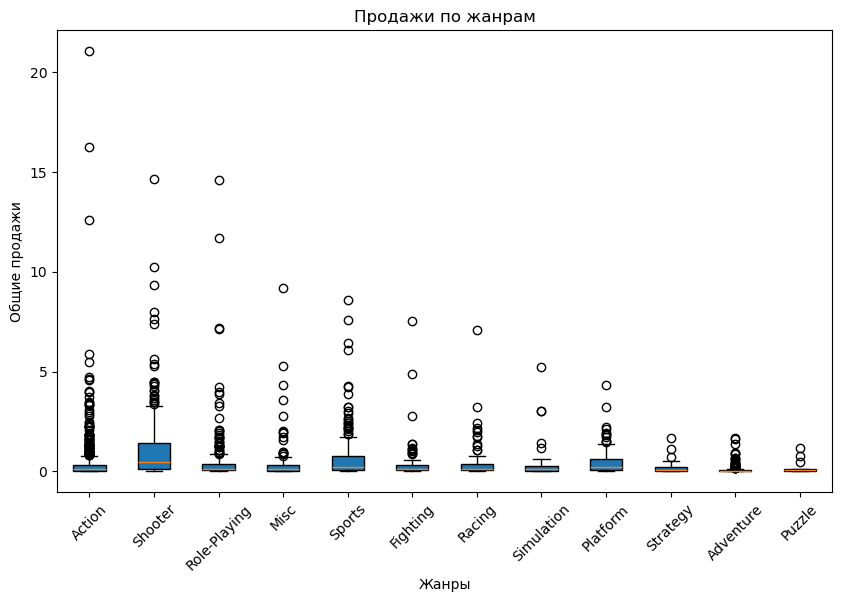

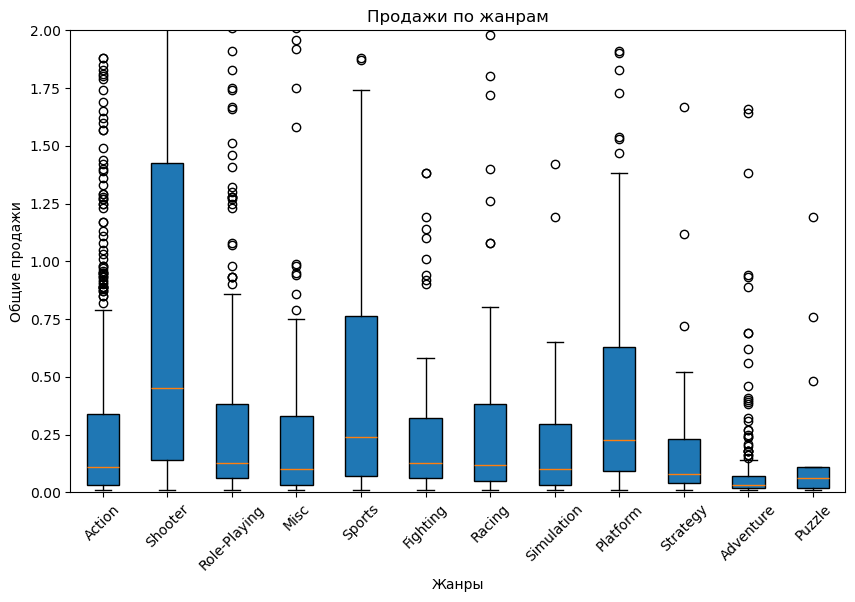

In [35]:
genre_names = data_13_16['genre'].unique()
genre_list = []

for genre in genre_names:
    distr = data_13_16.loc[data_13_16['genre'] == genre, 'overall_sales'].values
    genre_list.append(distr)

plt.figure(figsize=(10, 6))
plt.boxplot(genre_list, patch_artist=True)

plt.title('Продажи по жанрам')
plt.ylabel('Общие продажи')
plt.xlabel('Жанры')
plt.xticks(ticks = range(1, len(genre_names)+1), labels=genre_names, rotation=45)

plt.show()


genre_names_zoom = data_13_16['genre'].unique()
genre_list_zoom = []

for genre in genre_names_zoom:
    distr = data_13_16.loc[data_13_16['genre'] == genre, 'overall_sales'].values
    genre_list_zoom.append(distr)

plt.figure(figsize=(10, 6))
plt.boxplot(genre_list_zoom, patch_artist=True)

plt.title('Продажи по жанрам')
plt.ylabel('Общие продажи')
plt.xlabel('Жанры')
plt.xticks(ticks = range(1, len(genre_names_zoom)+1), labels=genre_names_zoom, rotation=45)
plt.ylim(0, 2)

plt.show()

Топ жанров по продажам: Action, Role-Playing, Adventure, Sports, Shooter, Misc. Но это не говорит о том, что эти жанры самые прибыльные, так как, возможно, только одна игра определенного жанра на определенную платформу могла бы продаваться в больших объемах и тем самым оказать наибольшее влияние на распределение данных. В этом случае нам поможет диаграмма размаха, чтобы посмотреть на медианы и сравнить их между собой. Медиана будет более объективнм показателем для определения прибыльных жанров.

Таким образом, жанр Shooter - самый прибыльный, Sports - на втором месте, Platform - на третьем, Role-Playing и Fighting делят 4 и 5 место.

**Исследовательский анализ - Вывод**
- были определены платформы с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS;
- определен срок "жизни" для каждой из этих платформ. 7 лет - за такой срок появляются и исчезают платформы, но, учитывая такую быстроразвивающуся сферу как игры было решено взять срок 4 года для дальнейшего анализа;
- отобраны платформы, лидирующие по продажам: PS4, PS3, XOne, 3DS, X360;
- отобраны платформы, падающие и растущие в продажах: PS3, 3DS, X360 - продажи падают, XOne и PS4 - возрастают;
- потенциально прибыльными платформами определены PS4 и XOne;
- определена платформа с самыми высокими продажами за период с 2013 по 2016 гг.: X360;
- проведен анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков: нет прямой заивисимости между отзывами и продажами;
- определены самые выгодные жанры: Shooter, Sports, Platform, Role-Playing, Fighting.

# Шаг 4. Портреты пользователей

## Самые популярные платформы (топ-5)
**Цель:** Описать различия в долях продаж.

In [36]:
platform_na_sales = data_13_16.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
platform_na_sales

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


**Топ-5 платформ в Северной Америке** - PS4, XOne, X360, PS3, 3DS

In [37]:
platform_eu_sales = data_13_16.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
platform_eu_sales

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


**Топ-5 платформ в Европе** - PS4, PS3, XOne, X360, 3DS

In [38]:
platform_jp_sales = data_13_16.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
platform_jp_sales

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


**Топ-5 платформ в Японии** - 3DS, PS3, PSV, PS4, WiiU

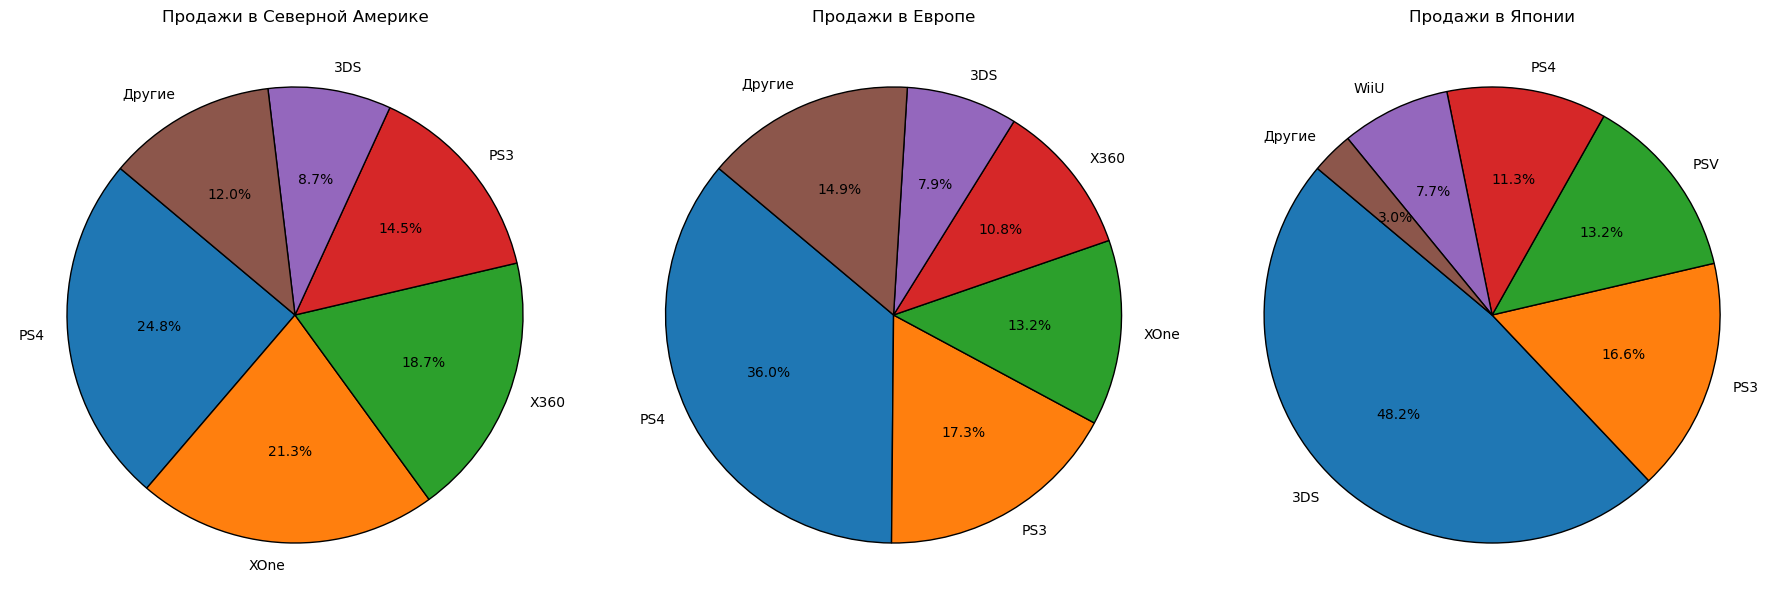

In [39]:
sales_data = [platform_na_sales, platform_eu_sales, platform_jp_sales]
titles = ['Продажи в Северной Америке', 'Продажи в Европе', 'Продажи в Японии']

# Создаем координатную сетку для 3 диаграмм
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Цикл по таблицам и построение pie chart
for i, (data_1, title) in enumerate(zip(sales_data, titles)):
    # Сортируем платформы по продажам
    sorted_data = data_1.sort_values(by=data_1.columns[0], ascending=False)
    
    # Берем топ-5 платформ
    top5 = sorted_data.head(5).copy()
    
    # Суммируем остальные продажи
    other_sales = sorted_data.iloc[5:].sum().copy()
    
    # Создаем новый DataFrame с топ-5 и "Другими"
    final_data = top5.copy()
    final_data.loc['Другие'] = other_sales.copy()
    
    # Данные для построения графика
    values = final_data.iloc[:, 0]
    labels = final_data.index
    
    # Строим pie chart
    axes[i].pie(
        values, labels=labels, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'edgecolor': 'black'}
    )
    axes[i].set_title(title)


plt.tight_layout()
plt.show()

**Популярные платформы:**
- Фаворитом в Северной Америке и Европе считается PS4 (24.8% и 36% соответственно), в то время как в Японии - 3DS (48.2%).
- Также рынки Северной Америки и Европы немного схожи как визуально по круговой диаграмме, так и по названиям платформ, а в Японии предпочитают такие платформы как 3DS, PSV, WiiU.
- Доли "других" платформ в Северной Америке и Европе также слабо отличаются, а в Японии "другие" платформы занимают меньшую долю рынка.

## Самые популярные жанры (топ-5)
**Цель:** Описать различия в долях продаж.

In [40]:
genre_na_sales = data_13_16.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
genre_na_sales

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


**Топ-5 жанров в Северной Америке** - Action, Shooter, Sports, Role-Playing, Misc

In [41]:
genre_eu_sales = data_13_16.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
genre_eu_sales

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


**Топ-5 жанров в Европе** - Action, Shooter, Sports, Role-Playing, Racing

In [42]:
genre_jp_sales = data_13_16.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
genre_jp_sales

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


**Топ-5 жанров в Японии** - Role-Playing, Action, Misc, Fighting, Shooter

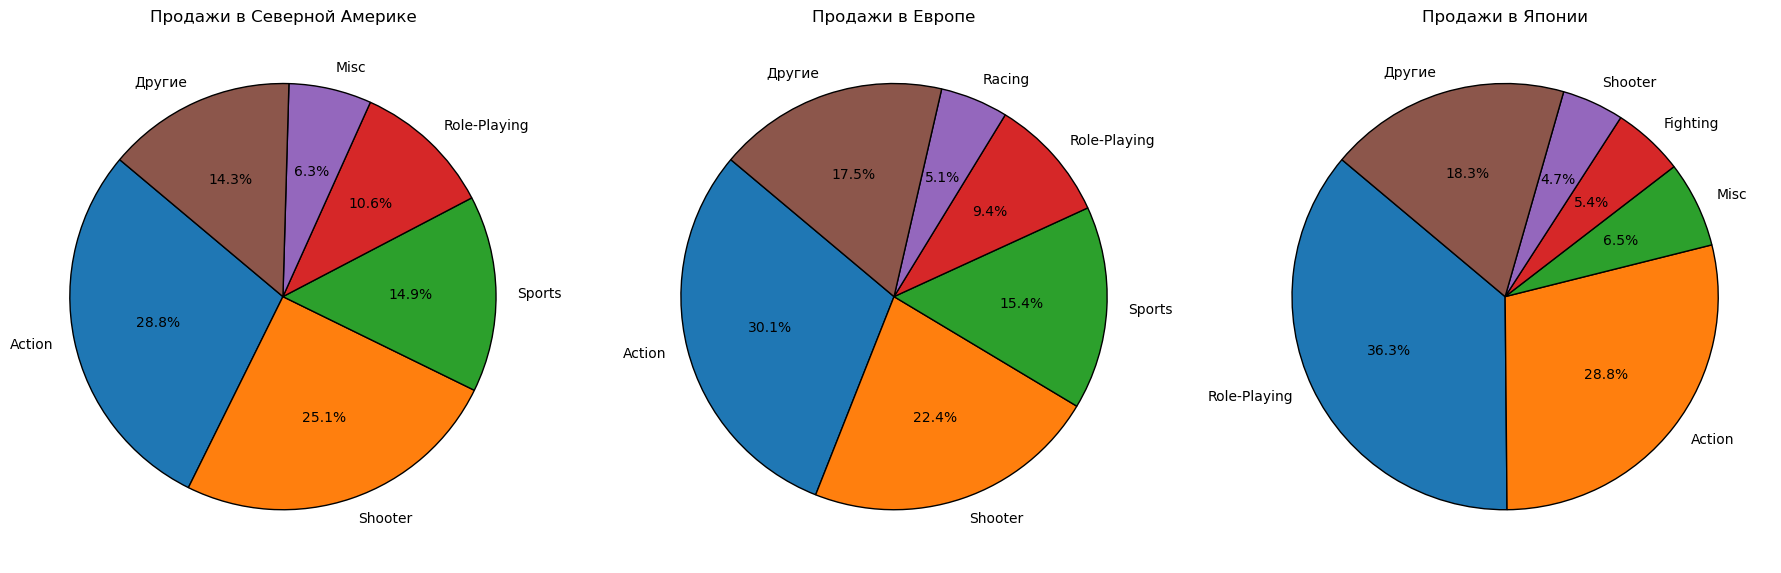

In [43]:
genre_data = [genre_na_sales, genre_eu_sales, genre_jp_sales]
titles = ['Продажи в Северной Америке', 'Продажи в Европе', 'Продажи в Японии']

# Создаем координатную сетку для 3 диаграмм
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Цикл по таблицам и построение pie chart
for i, (data_1, title) in enumerate(zip(genre_data, titles)):
    # Сортируем платформы по продажам
    sorted_data = data_1.sort_values(by=data_1.columns[0], ascending=False)
    
    # Берем топ-5 платформ
    top5 = sorted_data.head(5)
    
    # Суммируем остальные продажи
    other_sales = sorted_data.iloc[5:].sum()
    
    # Создаем новый DataFrame с топ-5 и "Другими"
    final_data = top5.copy()
    final_data.loc['Другие'] = other_sales
    
    # Данные для построения графика
    values = final_data.iloc[:, 0]
    labels = final_data.index
    
    # Строим pie chart
    axes[i].pie(
        values, labels=labels, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'edgecolor': 'black'}
    )
    axes[i].set_title(title)


plt.tight_layout()
plt.show()

**Популярные жанры:**
- Action - самый популярный жанр в Северной Америке (28.8%) и Европе (30.1%), в Японии - Role-Playing (36.3%).
- Sports - не пользуется популярностью, в то время как в Северной Америке и Европе входит в топ-3.

## Рейтинг ESRB на продажи в отдельных регионах
**Цель:** определить, влияет ли рейтинг ESRB на продажи в отдельном регионе.\
«M» («Mature») — «Для взрослых»\
«E» («Everyone») — «Для всех»\
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»\
«T» («Teen») — «Подросткам»

In [44]:
genre_na_rating = data_13_16.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
genre_na_rating

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


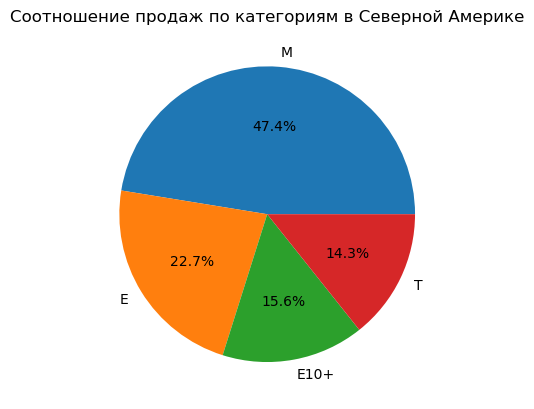

In [45]:
labels = genre_na_rating.index
values = genre_na_rating['na_sales']

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Соотношение продаж по категориям в Северной Америке')

plt.show()

В Северной Америке преобладает категория "для взрослых" - занимает почти половину от общего количества.

In [46]:
genre_eu_rating = data_13_16.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
genre_eu_rating

,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


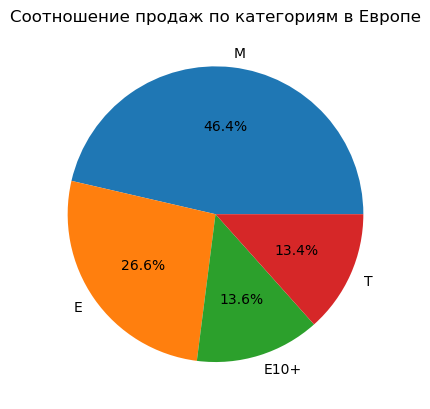

In [47]:
labels = genre_eu_rating.index
values = genre_eu_rating['eu_sales']

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Соотношение продаж по категориям в Европе')

plt.show()

Аналогично в Европе.

In [48]:
genre_jp_rating = data_13_16.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
genre_jp_rating

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


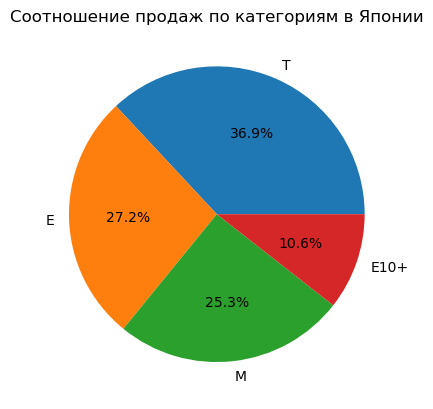

In [49]:
labels = genre_jp_rating.index
values = genre_jp_rating['jp_sales']

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Соотношение продаж по категориям в Японии')

plt.show()

В Японии преобладет категория "подросткам", но с отрывом на небольшой процент. Категории "для всех" и "для взрослых" схожи в процентном соотношении.

# Шаг 5. Проверка гипотез

**Нулевая гипотеза** - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
**Альтернативная гипотеза** - Рейтинги отличаются.

In [50]:
rating_xboxone = data_13_16.query('platform == "XOne"')['user_score'].dropna()
rating_pc = data_13_16.query('platform == "PC"')['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(rating_xboxone, rating_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


**Нулевая гипотеза** - Средние пользовательские рейтинги жанров Action и Sports равны.\
**Альтернативная гипотеза** - Рейтинги отличаются.

In [51]:
rating_action = data_13_16.query('genre == "Action"')['user_score'].dropna()
rating_sports = data_13_16.query('genre == "Sports"')['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(rating_action, rating_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


**Проверка гипотез - Вывод**
1. Средние пользовательские рейтинги платформ Xbox One и PC с большой вероятностью - одинаковые, так как не удалось опровергнуть нулевую гипотезу.\
2. Средние пользовательские рейтинги жанров Action и Sports отличаются, так как мы отвергли нулевую гипотезу.

Был применен двусторонний Т-тест, потому что мы хотим проверить, различаются ли средние рейтинги платформ/жанров, но не предполагаем заранее, какая/какой из них имеет более высокий или более низкий рейтинг, и, так как альтернативная гипотеза не уточняет направление.

Принимая или отвергая нулевую гипотезу, мы руководствовались значением p-value и сравнивали его с уровнем статистической значимости: если pvalue < 0.05, отвергали нулевую гипотезу; если pvalue > 0.05 - не можем отвергнуть.

# Вывод
Целью исследования было выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании


***1. Подготовлены данные:***
  - заменены названия столбцов;
  - преобразованы данные в нужные типы;
  - обработаны пропуски;
  - посчитаны суммарные продажи во всех регионах.

***2. Проведен исследовательский анализ данных:***
  - были определены платформы с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS;
  - определен срок "жизни" для каждой из этих платформ. 7 лет - за такой срок появляются и исчезают платформы;
  - для анализа определен срок в 4 года - с 2013 по 2016 гг.;
  - отобраны платформы, лидирующие по продажам: PS4, PS3, XOne, 3DS, X360;
  - отобраны платформы, падающие и растущие в продажах: PS3, 3DS, X360 - продажи падают, XOne и PS4 - возрастают;
  - потенциально прибыльными платформами определены PS4 и XOne;
  - определена платформа с самыми высокими продажами за период с 2013 по 2016 гг.: X360;
  - проведен анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков: нет прямой зависимости между отзывами и продажами;
  - определены самые выгодные жанры: Shooter, Sports, Platform, Role-Playing, Fighting.

***3. Составлены портреты пользователей каждого региона:***
  - PS4 - лидер в Северной Америке и Европе, в Японии - 3DS;
  - Action - самый популярный жанр в Северной Америке и Европе, в Японии - Role-Playing;
  - В Северной Америке и Европе преобладает категория "для взрослых", в Японии - категория "подросткам".

***4. Были проверены гипотезы:***
  - рейтинги платформ Xbox One и PC с большой вероятностью - одинаковые;
  - средние пользовательские рейтинги жанров Action и Sports отличаются.

**Таким образом выявлены определяющие успешность игры закономерности:**
- игра выпускается на относительно новую платформу (PS4 для Северной Америки и Европы, 3DS для Японии);
- жанр игры Action для Северной Америки и Европы, Role-Playing - для Японии;
- категория "для взрослых" для Северной Америки и Европы, "подросткам" - для Японии.